In [1]:
#standard imports
import pandas as pd #pandas
import numpy as np #numpy
import pingouin as ping #one-liner anovas
import seaborn as sns #data viz
import matplotlib.pyplot as plt #data viz
from matplotlib.ticker import FormatStrFormatter #viz formatting

In [2]:
#Import data
data=pd.read_csv(r"C:\Users\Victoria Guzik\Downloads\video_likes.csv")

In [3]:
#filter out users who didn't see an image/ have the opportunity to click
data_filtered=data[data["user_saw_image"]>0]

In [4]:
data_desk=data_filtered[data_filtered["exp"]=="DesktopVideoReactionModule"]
data_mobile=data_filtered[data_filtered["exp"]=="MobileVideoReactionModule"]

In [5]:
mobile_counts=data_mobile[["var","user_clicked"]].value_counts().reset_index()

In [6]:
desktop_counts=data_desk[[ "var","user_clicked"]].value_counts().reset_index()

In [7]:
mobile_vars=mobile_counts[mobile_counts["user_clicked"]>0].drop("user_clicked", axis=1).rename(mapper={0:"num_clicks"}, axis=1)
desktop_vars=desktop_counts[desktop_counts["user_clicked"]>0].drop("user_clicked", axis=1).rename(mapper={0:"num_clicks"},axis=1)

Text(0, 0.5, 'Number of Clicks')

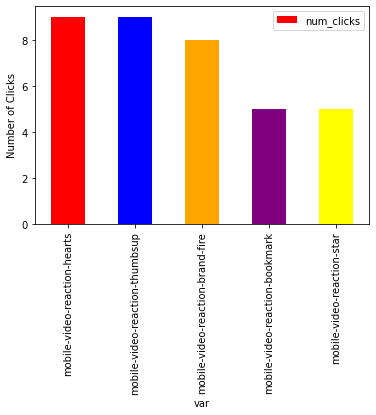

In [8]:
mobile_vars.plot.bar("var", "num_clicks", color=["red", "blue", "orange", "purple", "yellow"] )
plt.ylabel("Number of Clicks")

Text(0, 0.5, 'Number of Clicks')

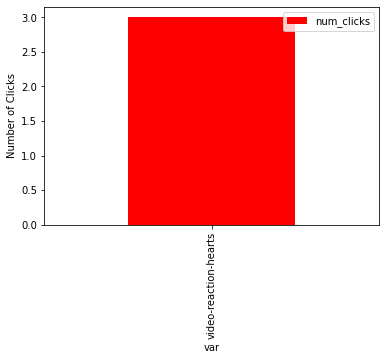

In [9]:
desktop_vars.plot.bar("var", "num_clicks", color="red" )
plt.ylabel("Number of Clicks")


In [10]:
def percent(table):
    table=table.pivot_table(index="var", columns="user_clicked", values=0).reset_index()
    table["total"]=table[0]+table[1]
    table["Percent"]=(table[1]/table["total"])*100
    return table

In [11]:
mobile_wide=percent(mobile_counts)

Text(0, 0.5, 'Percentage of Users Who Clicked')

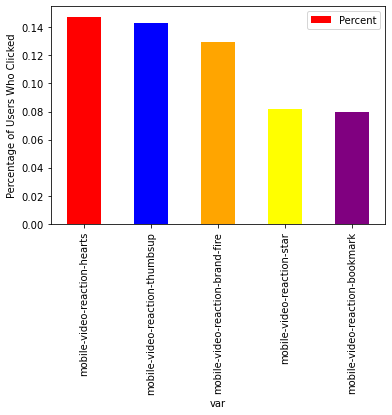

In [12]:
mobile_wide.sort_values(by="Percent", ascending=False).plot.bar("var", "Percent", color=["red", "blue", "orange", "yellow", "purple"])
plt.ylabel("Percentage of Users Who Clicked")

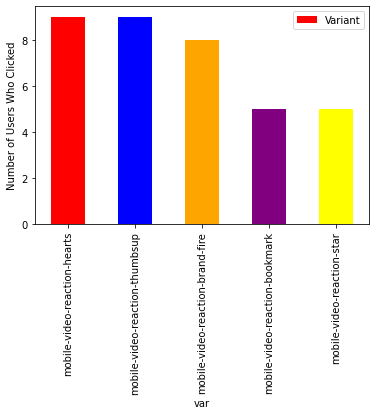

In [17]:
mobile_wide.sort_values(by=1, ascending=False).plot.bar("var", 1, color=["red", "blue", "orange", "purple","yellow"])
plt.ylabel("Number of Users Who Clicked")
plt.legend(["Variant"])

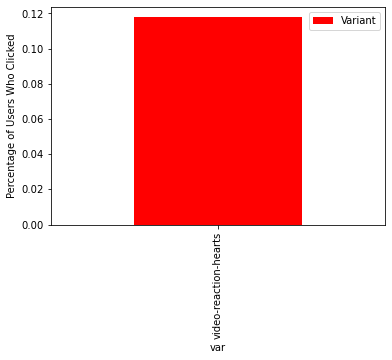

In [18]:
desktop_wide=percent(desktop_counts).dropna()
desktop_wide.plot.bar("var","Percent", color="red")
plt.ylabel("Percentage of Users Who Clicked")


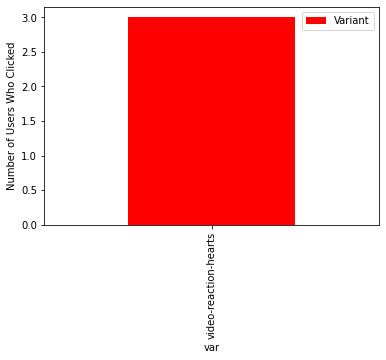

In [19]:
desktop_wide=percent(desktop_counts).dropna()
desktop_wide.plot.bar("var", 1, color="red")
plt.ylabel("Number of Users Who Clicked")
plt.legend(["Variant"])

In [21]:
desktop_wide[[1,"total"]].sum()

user_clicked
1           3.0
total    2548.0
dtype: float64